In [48]:
import pandas as pd
data = pd.read_csv("daily_CCH_RF.csv")
data

,Year,Month,Day,Rainfall
0,1992,4,1,0.5
1,1992,4,2,0.5
2,1992,4,3,12.5
3,1992,4,4,17
4,1992,4,5,40
...,...,...,...,...
11652,2024,2,25,22
11653,2024,2,26,10
11654,2024,2,27,21
11655,2024,2,28,15


In [49]:
# Convert the date columns to datetime format
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data

,Year,Month,Day,Rainfall,Date
0,1992,4,1,0.5,1992-04-01
1,1992,4,2,0.5,1992-04-02
2,1992,4,3,12.5,1992-04-03
3,1992,4,4,17,1992-04-04
4,1992,4,5,40,1992-04-05
...,...,...,...,...,...
11652,2024,2,25,22,2024-02-25
11653,2024,2,26,10,2024-02-26
11654,2024,2,27,21,2024-02-27
11655,2024,2,28,15,2024-02-28


In [50]:
# Convert 'Value' column to numeric with coerce to turn strings into NaN
numeric_values = pd.to_numeric(data['Rainfall'], errors='coerce')

# Count the number of NaN values, which represent strings
num_strings = numeric_values.isna().sum()

print("Number of string values in 'Rainfall' column:", num_strings)

string_records = data[pd.to_numeric(data['Rainfall'], errors='coerce').isna()]

print("String records in 'Rainfall' column:")
print(string_records)

Number of string values in 'Rainfall' column: 204
String records in 'Rainfall' column:
       Year  Month  Day Rainfall       Date
113    1992      7   23      *** 1992-07-23
346    1993      3   13      *** 1993-03-13
347    1993      3   14      *** 1993-03-14
348    1993      3   15      *** 1993-03-15
349    1993      3   16      *** 1993-03-16
...     ...    ...  ...      ...        ...
11141  2022     10    2      *** 2022-10-02
11142  2022     10    3      *** 2022-10-03
11143  2022     10    4      *** 2022-10-04
11144  2022     10    5      *** 2022-10-05
11145  2022     10    6      *** 2022-10-06

[204 rows x 5 columns]


In [51]:
# Convert 'Value' column to numeric with coerce to turn strings into NaN
numeric_values = pd.to_numeric(data['Rainfall'], errors='coerce')

# fill with previouse value fill missing values backward along columns
data['Rainfall'] = numeric_values.bfill(axis=0)

print("DataFrame with string records in 'Rainfall' column replaced with 0:")
print(data)

DataFrame with string records in 'Rainfall' column replaced with 0:
       Year  Month  Day  Rainfall       Date
0      1992      4    1       0.5 1992-04-01
1      1992      4    2       0.5 1992-04-02
2      1992      4    3      12.5 1992-04-03
3      1992      4    4      17.0 1992-04-04
4      1992      4    5      40.0 1992-04-05
...     ...    ...  ...       ...        ...
11652  2024      2   25      22.0 2024-02-25
11653  2024      2   26      10.0 2024-02-26
11654  2024      2   27      21.0 2024-02-27
11655  2024      2   28      15.0 2024-02-28
11656  2024      2   29       0.0 2024-02-29

[11657 rows x 5 columns]


In [52]:
data
data.apply(pd.isnull).sum()

Year        0
Month       0
Day         0
Rainfall    0
Date        0
dtype: int64

In [53]:
data.apply(pd.isnull).sum()/data.shape[0]

Year        0.0
Month       0.0
Day         0.0
Rainfall    0.0
Date        0.0
dtype: float64

In [54]:
core_data = data[['Date','Rainfall']]
core_data .set_index('Date', inplace = True)
core_data

,Rainfall
Date,
1992-04-01,0.5
1992-04-02,0.5
1992-04-03,12.5
1992-04-04,17.0
1992-04-05,40.0
...,...
2024-02-25,22.0
2024-02-26,10.0
2024-02-27,21.0


In [55]:
core_data['Rainfall'].value_counts()

Rainfall
0.0      8246
0.5       531
1.0       281
1.5       184
2.0       146
         ... 
153.5       1
64.5        1
87.5        1
172.5       1
249.0       1
Name: count, Length: 239, dtype: int64

In [56]:
core_data.dtypes

Rainfall    float64
dtype: object

<Axes: xlabel='Date'>

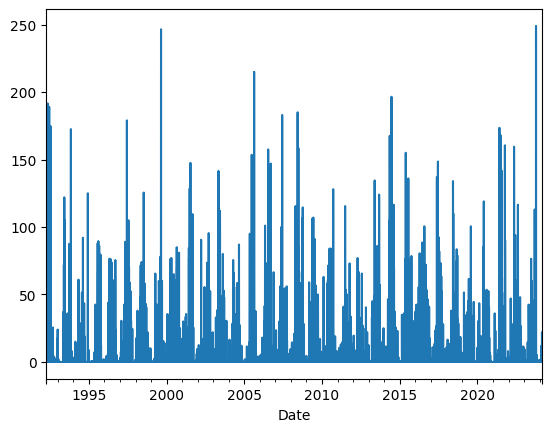

In [57]:
core_data ['Rainfall'].plot()

In [58]:
core_data.groupby(core_data.index.year).sum()["Rainfall"]

Date
1992    1562.0
1993    1344.0
1994    1283.5
1995    1016.0
1996    1693.0
1997    2016.0
1998    1487.0
1999    1677.5
2000    1645.5
2001    2118.0
2002    1353.0
2003    1474.5
2004    1195.0
2005    2073.5
2006    1748.0
2007    1395.5
2008    2269.5
2009    1658.0
2010    1790.5
2011    1028.0
2012    1270.5
2013    1874.0
2014    2059.0
2015    1641.0
2016    2253.5
2017    1736.0
2018    1788.5
2019    1516.0
2020    1283.5
2021    1807.0
2022    1741.0
2023    1626.5
2024     113.0
Name: Rainfall, dtype: float64

In [62]:
core_data["nextRainfall"] = core_data.shift(-1)["Rainfall"]
core_data

C:\Users\Sampath Medawatta\AppData\Local\Temp\ipykernel_43344\963531549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data["nextRainfall"] = core_data.shift(-1)["Rainfall"]


,Rainfall,nextRainfall
Date,,
1992-04-01,0.5,0.5
1992-04-02,0.5,12.5
1992-04-03,12.5,17.0
1992-04-04,17.0,40.0
1992-04-05,40.0,34.5
...,...,...
2024-02-25,22.0,10.0
2024-02-26,10.0,21.0
2024-02-27,21.0,15.0


In [63]:
core_data = core_data.iloc[:-1,:].copy()
core_data

,Rainfall,nextRainfall
Date,,
1992-04-01,0.5,0.5
1992-04-02,0.5,12.5
1992-04-03,12.5,17.0
1992-04-04,17.0,40.0
1992-04-05,40.0,34.5
...,...,...
2024-02-24,0.0,22.0
2024-02-25,22.0,10.0
2024-02-26,10.0,21.0


In [64]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [65]:
predictors = ["Rainfall"]


In [70]:
train = core_data.loc[:"2020-12-31"]
train

,Rainfall,nextRainfall
Date,,
1992-04-01,0.5,0.5
1992-04-02,0.5,12.5
1992-04-03,12.5,17.0
1992-04-04,17.0,40.0
1992-04-05,40.0,34.5
...,...,...
2020-12-27,0.0,0.0
2020-12-28,0.0,0.0
2020-12-29,0.0,0.0


In [71]:
test = core_data.loc["2021-01-01":]
test

,Rainfall,nextRainfall
Date,,
2021-01-01,0.0,0.0
2021-01-02,0.0,0.0
2021-01-03,0.0,0.0
2021-01-04,0.0,0.0
2021-01-05,0.0,0.0
...,...,...
2024-02-24,0.0,22.0
2024-02-25,22.0,10.0
2024-02-26,10.0,21.0


In [72]:
reg.fit(train[predictors],train["nextRainfall"])

Ridge(alpha=0.1)

In [75]:
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_squared_error
mean_squared_error(test["nextRainfall"], predictions)

270.27182469097517

In [76]:
combined = pd.concat([test["nextRainfall"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

combined

,actual,predictions
Date,,
2021-01-01,0.0,3.143759
2021-01-02,0.0,3.143759
2021-01-03,0.0,3.143759
2021-01-04,0.0,3.143759
2021-01-05,0.0,3.143759
...,...,...
2024-02-24,22.0,3.143759
2024-02-25,10.0,9.771112
2024-02-26,21.0,6.156192


<Axes: xlabel='Date'>

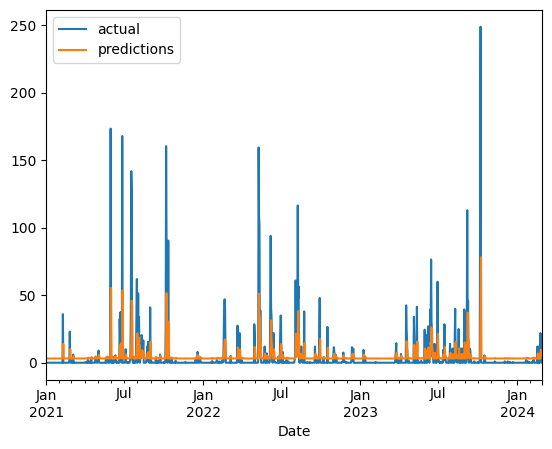

In [77]:
combined.plot()

In [78]:
reg.coef_

array([0.30124334])

In [80]:
core_data["Rainfall_month_max"] = core_data["Rainfall"].rolling(30).mean()

core_data = core_data.iloc[30:,:].copy()

In [84]:
def create_predictions(predictors, core_data, reg):
    train = core_data.loc[:"2020-12-31"]
    test = core_data.loc["2021-01-01":]

    reg.fit(train[predictors], train["nextRainfall"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["nextRainfall"], predictions)
    
    combined = pd.concat([test["nextRainfall"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [90]:
combined

,actual,predictions
Date,,
2021-01-01,0.0,1.688773
2021-01-02,0.0,1.688773
2021-01-03,0.0,1.688773
2021-01-04,0.0,1.688773
2021-01-05,0.0,1.688773
...,...,...
2024-02-24,22.0,2.188965
2024-02-25,10.0,8.293737
2024-02-26,21.0,5.213958


<Axes: xlabel='Date'>

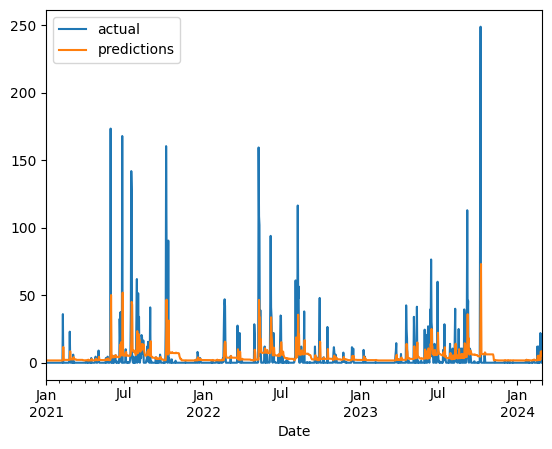

In [93]:
combined.plot()

In [94]:
core_data

,Rainfall,nextRainfall,Rainfall_month_max
Date,,,
1992-05-01,0.0,0.0,9.783333
1992-05-02,0.0,0.0,9.766667
1992-05-03,0.0,0.0,9.350000
1992-05-04,0.0,0.0,8.783333
1992-05-05,0.0,0.0,7.450000
...,...,...,...
2024-02-24,0.0,22.0,1.400000
2024-02-25,22.0,10.0,2.133333
2024-02-26,10.0,21.0,2.433333
